# Exercise 3 in Classical Mechnics
**By Martin Johnsrud**

In [1]:
import numpy as np
from numpy import pi, cos, exp, sin
from cmath import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

In [2]:
font = {
    'family' : 'serif', 
    'weight' : 'normal', 
    'size'   : 16
}
    
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rc("lines", lw = 1.2, markersize = 1)
plt.rc('font', **font)
plt.rc("legend", fontsize = 12)

m = 1
g = 9.81
l = g
w0 = abs(sqrt(g / l / m))
q = 0.5

wd = 2/3

theta_0 = 0.2
thetaDot_0 = 0
y0 = np.array([theta_0, thetaDot_0])

### Physical pendulum

A physical pendulum is modeled by a non linear, second order differential equation,

$$
    \frac{\mathrm{d}^2}{\mathrm{d}t^2} \theta = - \omega_0^2 \sin(\theta) - q \frac{\mathrm{d}}{\mathrm{d}t} \theta + F_d \sin{(\omega_Dt)}.
$$

This can be rewritten in the form as a first order vector differntial equation,

$$
    y =
    \begin{pmatrix}
        \theta \\
        \dot \theta
    \end{pmatrix}, \quad
    f(y, t) = \frac{\mathrm{d}}{\mathrm{d}t} y = 
    \begin{pmatrix}
        \dot \theta \\
        q \dot \theta - \omega_0^2 \sin(\theta)  + F_d \sin(\omega_Dt)
    \end{pmatrix},
$$

which can bve solved numerically by for example the Runge-Kutta 4 method, as in this excercise.

In [3]:
# The differential equation for a physical, driven and damped pendulum
def f(y, *args):
    (t, Fd) = args
    return np.array([
        y[1],
        -q * y[1]  - w0**2 * sin(y[0]) + Fd * sin(wd * t)
    ])

# Runge kutta 4 diff.eq solver
def RK4(y, f, dt, i, *args):
    k1 = f(y[i], *args) * dt
    k2 = f(y[i] + k1 / 2, *args) * dt
    k3 = f(y[i] + k2 / 2, *args) * dt
    k4 = f(y[i] + k3, *args) * dt
    y[i + 1]  = (y[i] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)) 

In [4]:
# Limits y to ran (Range), and returns array of indecies where y passes outside ran
def findSlice(y, ran):
    length = ran[1] - ran[0]
    # where to chop the array for plotting
    y = y - ran[0]
    cut = np.nonzero(np.diff((y / length) // 1))
    y = y % length
    y = y + ran[0]
    return y, cut[0]

# Plotting a function to ax, limiting values to the range ran
def plotRangeLimited(x, y, ran, ax, color, label = "", style = "-", lw = 1.2):
    y, cut = findSlice(y, ran)
    stop = 0
    for newStop in cut:
        start = stop 
        stop = newStop + 1  
        ax.plot(x[start:stop], y[start:stop], style, color = color, linewidth = lw)
    return ax.plot(x[stop:-1], y[stop:-1], style, color = color, label = label, linewidth = lw)

In [5]:
def plotNumerics(x, y, Fds):
    N = len(y)
    fig, ax = plt.subplots(2, figsize=(18, 14), sharex = True)
    ax[1].set_xlabel("$t / [\\mathrm{s}]$")
    ax[0].set_ylabel("$\\theta$")
    ax[1].set_ylabel("$\\dot \\theta$")
    for i in range(N):
        color = cm.viridis(i/N)
        plotRangeLimited(x, y[i, :, 0], (-pi, pi), ax[0], color, label = "$F_d = {}$".format(Fds[i]))
        ax[1].plot(x, y[i, :, 1], color = color)

    ax[0].legend()
    plt.show()

dt = : 0.06


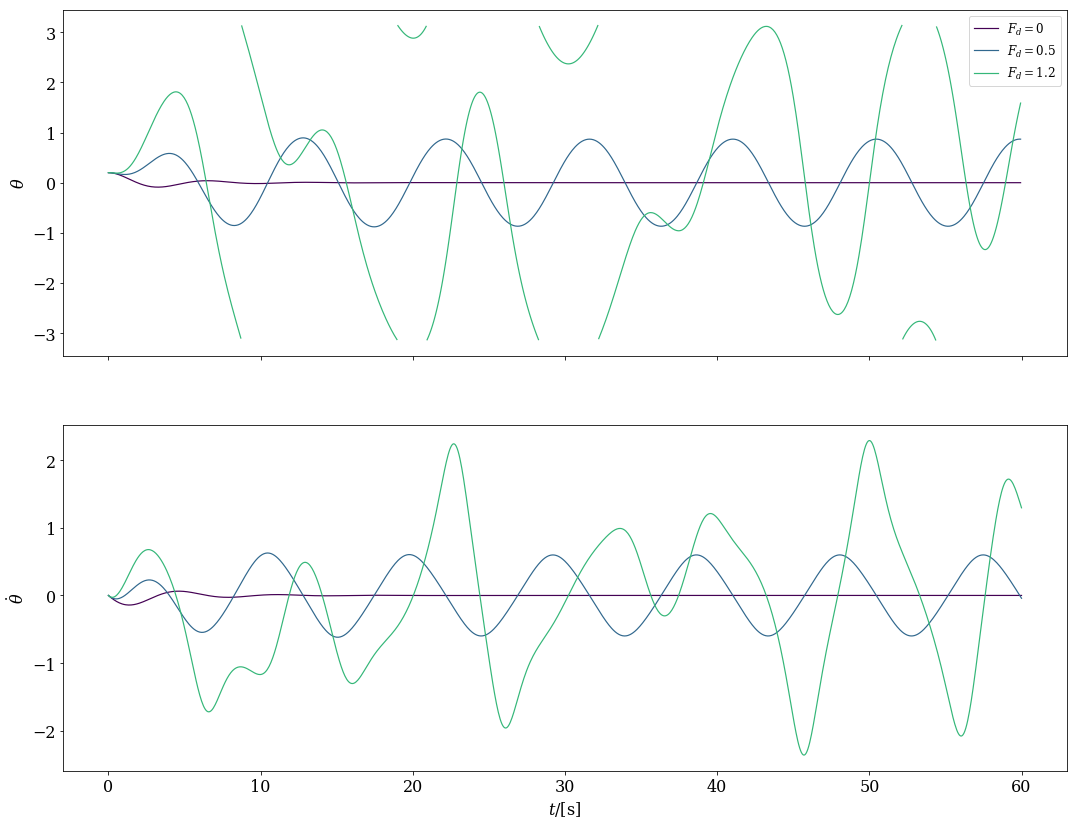

In [6]:
T = 60
n = 1001
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

Fds = [0, 0.5, 1.2]
N = len(Fds)

y = np.empty((N, n, 2))

for i in range(N):
    y[i, 0] = y0
    Fd = Fds[i]
    for j in range(n - 1):
        RK4(
            y[i], f, dt, j, 
            t[j], Fd
        )

plotNumerics(t, y, Fds)

In [7]:
def plotNumerics2(x, y, Fds, N):
    fig, ax = plt.subplots(2, figsize=(18, 14), sharex = True)
    ax[1].set_xlabel("$t / [\\mathrm{s}]$")
    ax[0].set_ylabel("$\\theta$")
    ax[1].set_ylabel("$\\Delta \\theta$")
    ax[1].semilogy(x, np.ones_like(x), "k--", label = "$\Delta \\theta = 1$")
    for i in range(N):
        color = cm.viridis(i/N)
        ax[1].semilogy(x, abs(y[i, :, 0] - y[i + N, :, 0]), 
                       color = cm.viridis(i/N), label =  "$F_d = {}$".format(Fds[i]))
        plotRangeLimited(x, y[i, :, 0], (-pi, pi), ax[0], 
                         cm.viridis(i/N), "$F_d = {}$".format(Fds[i]))
        plotRangeLimited(x, (y[i + N, :, 0]), (-pi, pi), ax[0],
                         cm.viridis(i/N), "$F_d = {} +\Delta t$".format(Fds[i]), style = "--")

    ax[0].legend()
    ax[1].legend()
    plt.show()

dt = : 0.06


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


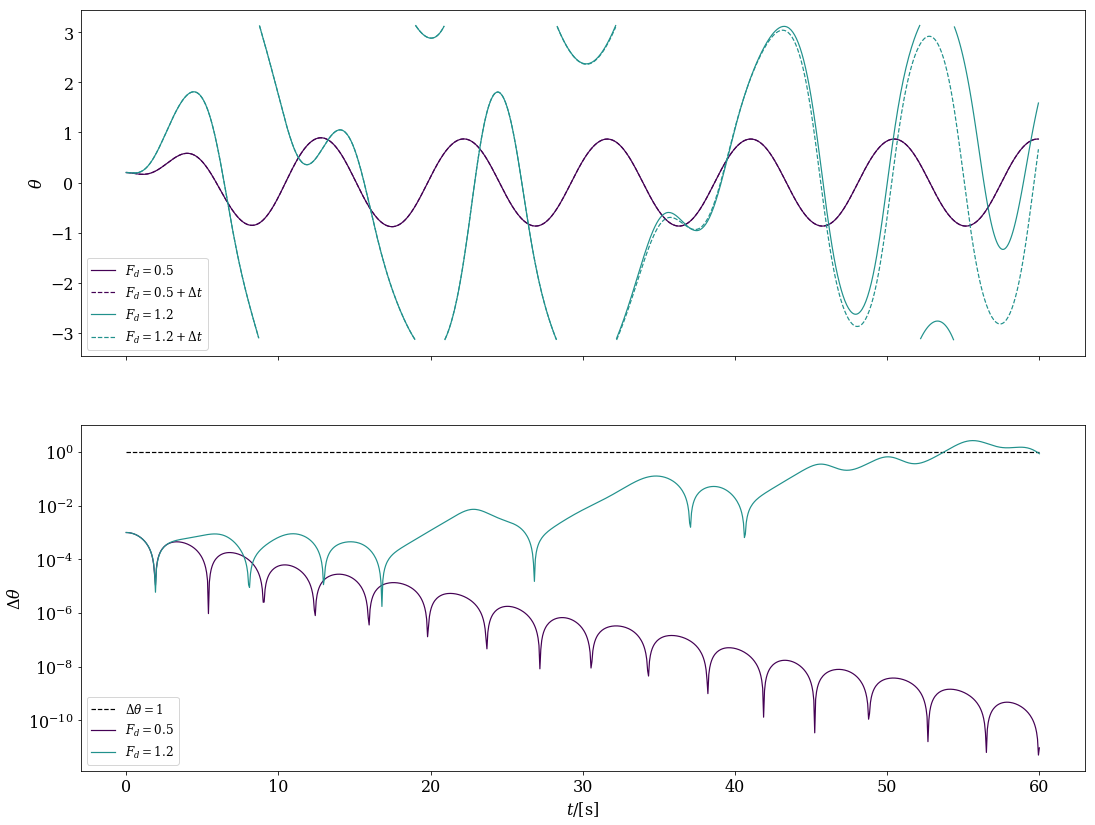

In [8]:
T = 60
n = 1001
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

Fds = [0.5, 1.2]
N = len(Fds)

y = np.empty((N*2, n, 2))

for i in range(N):
    Fd = Fds[i]
    y[i, 0] = np.array([theta_0, thetaDot_0])
    for j in range(n - 1):
        RK4(
            y[i], f, dt, j, 
            t[j], Fd
        )
        
    y[i + N, 0] = np.array([theta_0 + 0.001, thetaDot_0])
    for j in range(n - 1):
        RK4(
            y[i + N], f, dt, j, 
            t[j], Fd
        )

plotNumerics2(t, y, Fds, N)

In [28]:
def plotPhaseSpace(y, Fds):
    N = len(y)
    fig, ax = plt.subplots(1, figsize=(15, 15), sharex = True)
    ax.set_xlabel("$\\dot \\theta$")
    ax.set_ylabel("$\\theta$")
    for i in range(N):
        color = cm.viridis(i/N)
        plotRangeLimited(y[i, :, 1], y[i, :, 0], (-pi, pi), ax, 
                         color, "$F_d = {}$".format(Fds[i]), lw = 1)

    ax.legend()
    plt.show()

dt = : 0.1


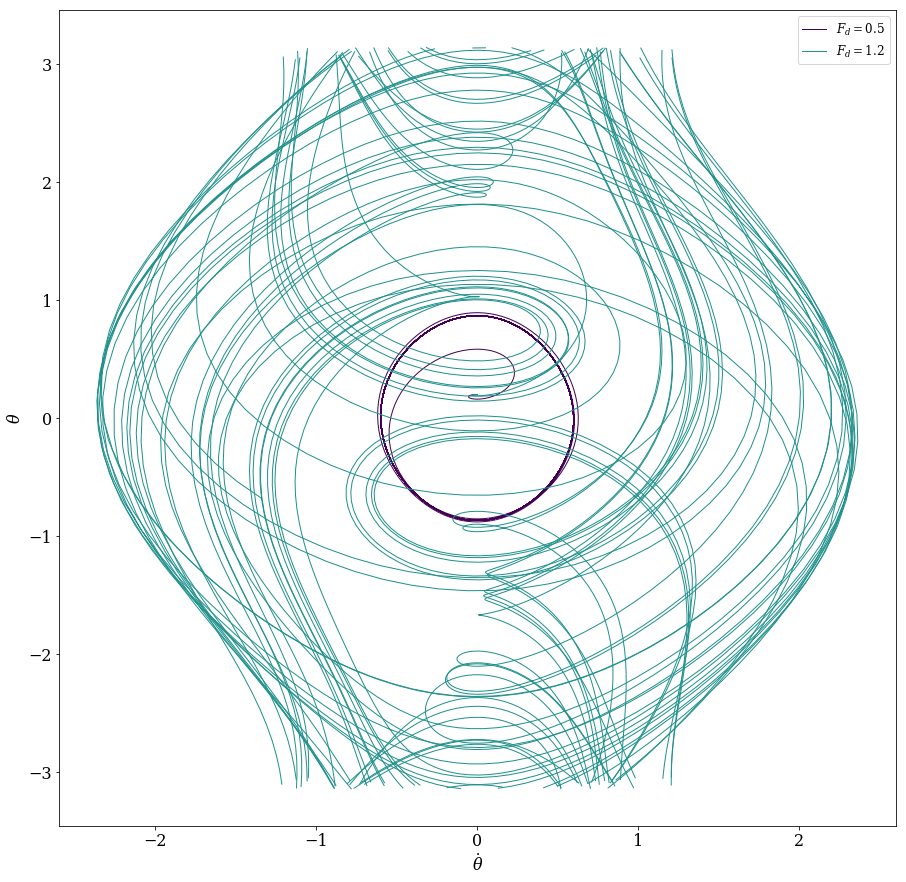

In [29]:
T = 500
n = 1 + T * 10
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

Fds = [0.5, 1.2]
N = len(Fds)

y = np.empty((N, n, 2))

for i in range(N):
    y[i, 0] = y0
    Fd = Fds[i]
    for j in range(n - 1):
        RK4(
            y[i], f, dt, j, 
            t[j], Fd
        )
plotPhaseSpace(y, Fds)

In [39]:
def plotStrobo(t, y, period, Fd):
    fig, ax = plt.subplots(1, figsize=(20, 20))
    a = np.gradient((t/period) // 1).astype(bool)
    plotRangeLimited(y[:, 1], y[:, 0], (0, 2*pi), ax, 
                     cm.viridis(0.5), style = "-", lw = 0.1, label = "$F_d = {}$".format(Fd))
    plotRangeLimited(y[a, 1], y[a, 0],(0, 2*pi), ax, 
                     "black", style = ".", label = "Poincaré section")
    plt.legend()
    plt.show()

dt = : 0.005


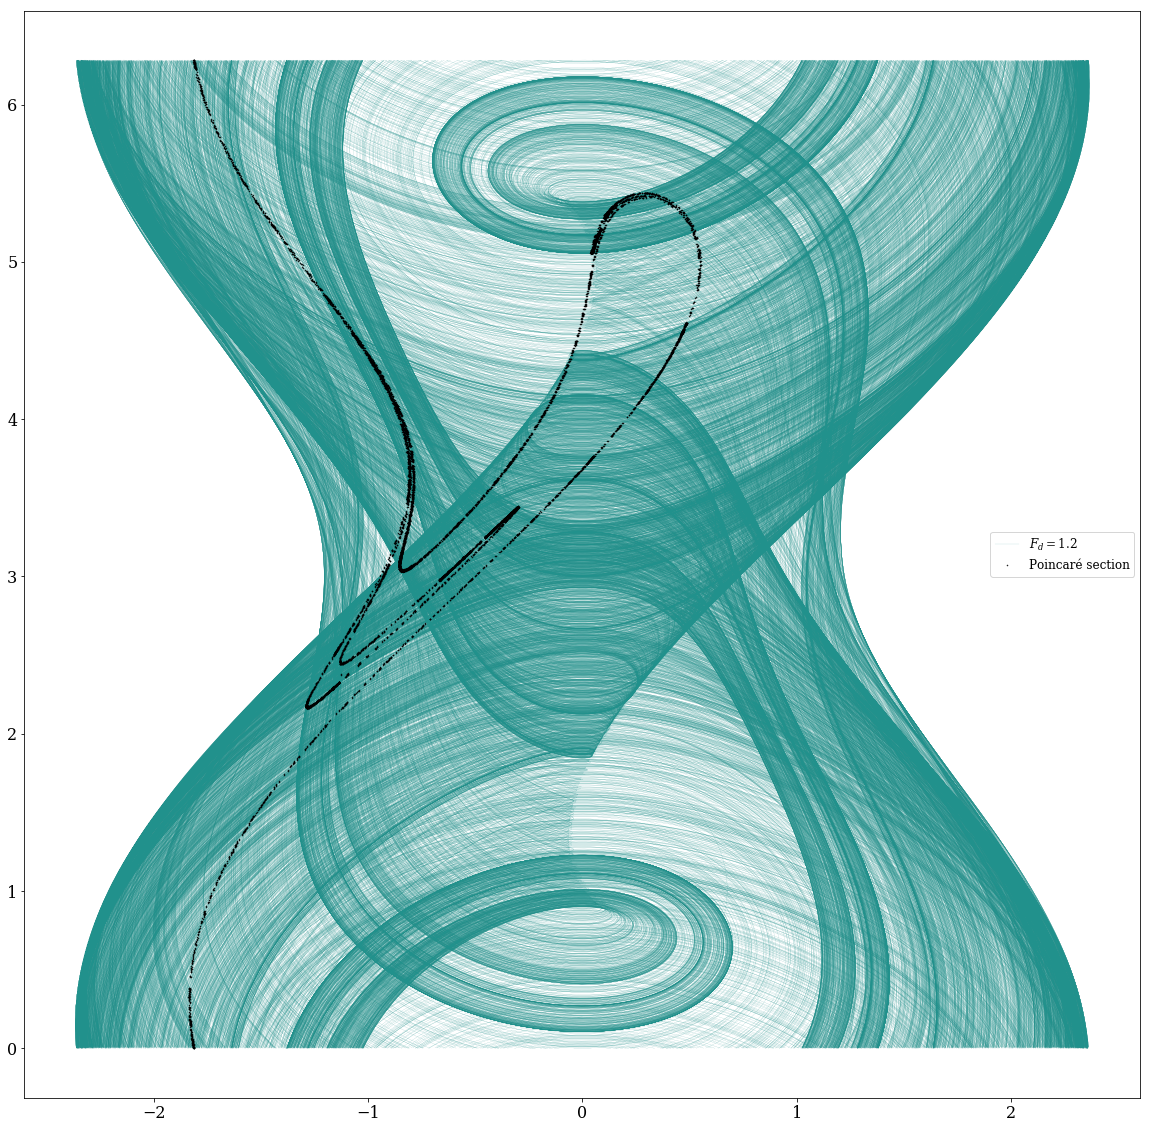

In [41]:
# This takes a lot of time
# It plots the interval (0, 2*pi) instead to get the detail of the Poincare map in the center
T = 50000
n = 1 + T * 200
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

Fd =1.2
y = np.empty((n, 2))
y[0] = y0

for j in range(n - 1):
    RK4(
        y, f, dt, j, 
        t[j], Fd
    )
        
plotStrobo(t, y, 2 * pi / wd, Fds)